# Best channel search no DWT

Realizando 20 rodadas de classificação com `SVC` no dataset `chb01` para determinar com qual canal se obtém os melhores resultados.

## Importando biblioteca

In [1]:
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Carregando dados

In [2]:
chb_dwt_df = pd.read_csv('./chb01.csv')

target_dwt_s = chb_dwt_df.pop('target')

random_seeds = np.random.randint(0, 9000, 20)

random_seeds

array([ 577, 3933, 8232, 7400, 1553, 3697, 8972, 7704, 1857, 6933, 5079,
       6939,  860,  363, 8304, 3688, 7374,  110, 5577, 8004])

## Realizando classificação por canal

In [3]:
channels_df = pd.DataFrame(columns=range(18))

for channel in range(18):

    channel_acc = []

    # X recebe apenas as colunas relacionadas ao canal da iteração
    X = chb_dwt_df[
        [column for column in chb_dwt_df.columns if (f'{channel}' in column.split('-'))]
    ].values
    y = target_dwt_s.values

    for seed in random_seeds:
        # Separando dados
        X_pre_train, X_pre_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

        # Pré-processando dados
        std_scaler = StandardScaler().fit(X_pre_train)

        X_train = std_scaler.transform(X_pre_train)
        X_test = std_scaler.transform(X_pre_test)

        # Instanciando classificador
        classifier = SVC(cache_size=500).fit(X_train, y_train)

        # Salvando acurácia da classificação
        channel_acc.append(classifier.score(X_test, y_test))
    
    channels_df[channel] = channel_acc

channels_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.961538,0.892308,0.892308,0.923077,0.938462,0.884615,0.938462,0.861538,0.946154,0.946154,0.961538,0.892308,0.961538,0.930769,0.938462,0.915385,0.938462,0.907692
1,0.923077,0.869231,0.846154,0.884615,0.915385,0.861538,0.915385,0.876923,0.946154,0.900000,0.946154,0.907692,0.938462,0.938462,0.930769,0.900000,0.876923,0.876923
2,0.984615,0.923077,0.930769,0.923077,0.969231,0.930769,0.930769,0.900000,0.953846,0.953846,0.969231,0.907692,0.976923,0.946154,0.953846,0.892308,0.923077,0.907692
3,0.969231,0.923077,0.915385,0.930769,0.938462,0.884615,0.946154,0.892308,0.938462,0.915385,0.953846,0.907692,0.969231,0.953846,0.953846,0.892308,0.853846,0.900000
4,0.953846,0.915385,0.884615,0.938462,0.930769,0.900000,0.946154,0.907692,0.938462,0.923077,0.953846,0.938462,0.961538,0.946154,0.923077,0.892308,0.907692,0.892308
5,0.953846,0.900000,0.907692,0.892308,0.953846,0.876923,0.869231,0.861538,0.969231,0.938462,0.946154,0.907692,0.992308,0.946154,0.953846,0.884615,0.907692,0.900000
6,0.984615,0.915385,0.892308,0.930769,0.976923,0.892308,0.930769,0.907692,0.984615,0.946154,0.992308,0.938462,0.969231,0.969231,0.946154,0.892308,0.892308,0.915385
7,0.938462,0.900000,0.884615,0.907692,0.938462,0.907692,0.923077,0.900000,0.969231,0.938462,0.930769,0.930769,0.961538,0.969231,0.915385,0.884615,0.900000,0.900000
8,0.938462,0.923077,0.907692,0.876923,0.930769,0.930769,0.930769,0.861538,0.938462,0.900000,0.946154,0.907692,0.961538,0.923077,0.946154,0.907692,0.892308,0.884615
9,0.938462,0.900000,0.853846,0.876923,0.923077,0.884615,0.915385,0.861538,0.900000,0.900000,0.930769,0.930769,0.930769,0.938462,0.953846,0.853846,0.884615,0.907692


,count,mean,std,min,25%,50%,75%,max
12,20.0,0.960385,0.017340,0.923077,0.951923,0.961538,0.969231,0.992308
0,20.0,0.951923,0.017975,0.915385,0.938462,0.953846,0.961538,0.984615
13,20.0,0.948846,0.016227,0.923077,0.938462,0.946154,0.963462,0.976923
8,20.0,0.947692,0.018776,0.900000,0.938462,0.946154,0.961538,0.984615
10,20.0,0.940385,0.021595,0.900000,0.928846,0.942308,0.953846,0.992308
4,20.0,0.940000,0.017219,0.907692,0.930769,0.938462,0.948077,0.976923
14,20.0,0.938846,0.014654,0.915385,0.928846,0.938462,0.953846,0.961538
6,20.0,0.923846,0.019316,0.869231,0.915385,0.926923,0.938462,0.946154
9,20.0,0.920000,0.022098,0.892308,0.900000,0.915385,0.938462,0.969231
11,20.0,0.910385,0.017519,0.884615,0.898077,0.907692,0.925000,0.938462


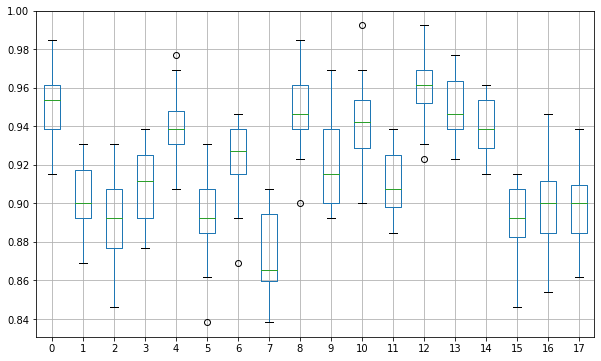

In [4]:
channels_df.boxplot(figsize=(10, 6))
channels_df.describe().transpose().sort_values(by='mean', ascending=False)